# Section:  Approximating functions - Lecture 3

## [3] Interpolation error

When interpolating a given function $f$ by a polynomial of degree $n$ at the nodes $x_0$, $\cdots$, $x_n$, it can be shown that we get the error
$$f(x) - p(x) = f[x_0, \cdots, x_n, x] \prod^n_{i=0}(x-x_i),$$
where $f[x_0, \cdots, x_n, x]$ is the notation for divided differences.

So in principle, to have a "best" interpolation we should choose nodes such that $\displaystyle\prod^n_{i=0}(x-x_i)$ is minimized, i.e., such that $\displaystyle \left\|\prod^n_{i=0}(x-x_i)\right\|_{\infty}$ is smallest.

In the following we use some examples to demonstrate the relation between the chosen nodes and the function $\displaystyle\prod^n_{i=0}(x-x_i)$. You will see that the Chebyshev nodes is the best.

**Note**: We are going to plot some figures that require the package PyPlot. If you haven't installed the PyPlot package, run "import Pkg; Pkg.add("PyPlot")".

### [3.1] Random Nodes
### Example 1

We first illustrate what happened if we simply choose random nodes to do the polynomial interpolation.

We choose some points on $[-1,1]$.

$-1=x_0<x_1<\cdots<x_5=1$, $x_{i1} := [x_0 , \cdots , x_5]^{\top}$

In [22]:
# some randomly chosen points
# (Here we pick the points randomly by hand but not using the function "rand")
xi1 = [-1; -0.6; -0.4; 0.1; 0.3; 1]

6-element Array{Float64,1}:
 -1.0
 -0.6
 -0.4
  0.1
  0.3
  1.0

We then construct the function $p_1(x) = \displaystyle\prod^5_{i=0}(x-x_i)$ and plot it. 

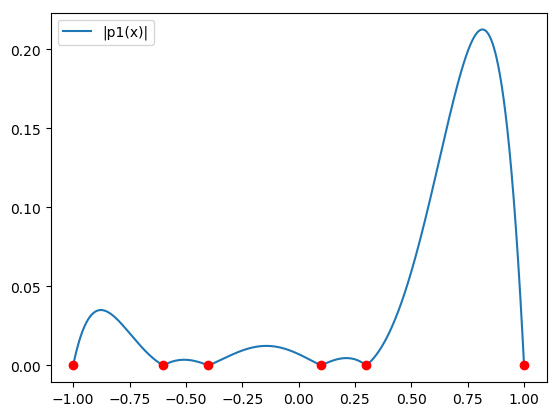

max. norm of p_1(x)=0.21256640190593978


In [23]:
# x: To plot the function we choose 1000 points in the interval
x = range(-1,stop=1,length=1000);

# constructing the function p_1(x)
p1 = x.-xi1[1];
for ii=1:5
    p1 = p1.*(x.-xi1[ii+1]);
end

# print the max. norm of p_1(x)
println("max. norm of p_1(x)=",maximum(abs.(p1)))

# plotting
using PyPlot
plot(x, abs.(p1),label="|p1(x)|");
plot(xi1, zeros(6,1), "or");
plt.legend();

We can see that the largest value of $p_1(x)$ occurs between $x_4$ and $x_5$. That is, if we use these nodes to interpolate a function, the max. interpolation error will happened between $x_4$ and $x_5$. 

So, to improve the accuracy of interpolation without changing the number of nodes, in this example, one can move $x_4$ a little bit. Now let $x_4:=0.7$. We construct $p_2(x)=(x-x_0)(x-x_1)\cdots(x-x_5)$ and plot it.

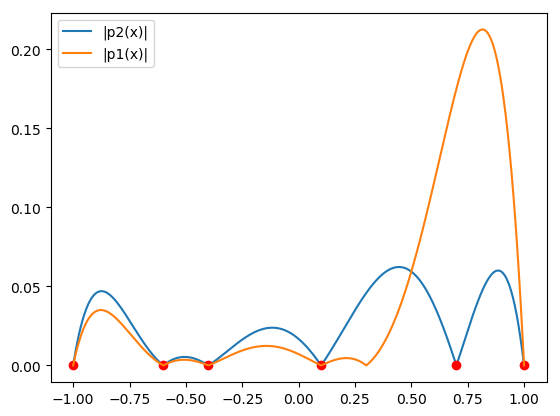

max. norm of p_2(x)=0.06230075192531127


In [24]:
# constructing the nodes
xi2 = zeros(6,1);
for ii=1:6
    xi2[ii] = xi1[ii];
end
xi2[5] = 0.7;

# constructing the function p_2(x)
p2 = x.-xi2[1];
for ii=1:5
    p2 = p2.*(x.-xi2[ii+1]);
end

# print the max. norm of p_2(x)
println("max. norm of p_2(x)=",maximum(abs.(p2)))

# plotting
plot(x, abs.(p2),label="|p2(x)|");
plot(xi2, zeros(n,1), "or");
plot(x, abs.(p1),label="|p1(x)|");
plt.legend();

Do you see that the error is smaller?

### [3.2] Equially spaced Nodes

Now let's try uniformly distributed points on $[-1,1]$:
$$x_k = -1 + 2\frac{k}{n} \quad k=0,1,2,\cdots,n,$$


### Example 2
<font color="red">**To be done**</font>
1. Write a function that shows the polynomial $\displaystyle \prod^n_{i=0}(x-x_i)$ when choose $n+1$ equally spaced points on [-1, 1]
2. Show the results for $n=5$, $10$ and $20$.

### [3.2] Chebyshev Nodes of the first kind

Consider chebychev nodes
$$x_{cheb}[k] := \cos\left(\frac{2k-1}{2n}\pi\right)$$ for $k=1,2,\cdots,n$

### Example 3
<font color="red">**To be done**</font>:Modify the following two codes a bit.
1. Write a function that shows the polynomial $\displaystyle \prod^n_{i=0}(x-x_i)$ when choose $n$ Chebyshev Nodes of the first kind. 
2. Show the results for $n=5$, $10$ and $20$.

In [8]:
xi_cheb = cos.(((1:n).-0.5)*pi/n)

6-element Array{Float64,1}:
  0.9659258262890683 
  0.7071067811865476 
  0.25881904510252074
 -0.25881904510252063
 -0.7071067811865475 
 -0.9659258262890682 

Construct $p_{cheb}(x)=(x-x_{cheb}[1])(x-x_{cheb}[2])\cdots(x-x_{cheb}[6])$. Define $Error = \displaystyle\max_{x\in [-1,1]}p_{cheb}(x)$. Plot $p_{cheb}(x)$.

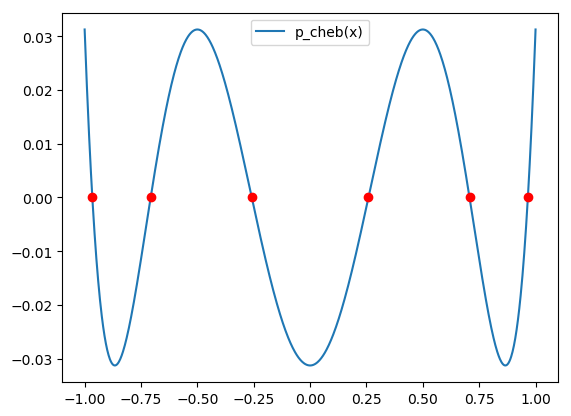

Error=0.03125000000000008


In [9]:
x2 = range(-1,stop=1,length=1000);
p_cheb = x2.-xi_cheb[1];
for ii=1:n-1
    p_cheb = p_cheb.*(x2.-xi_cheb[ii+1]);
end
println("Error=",maximum(abs.(p_cheb)))
plot(x2, (p_cheb),label="p_cheb(x)");
plot(xi_cheb, zeros(n,1), "or");
plt.legend();

### [3.2] Chebyshev Nodes of the second kind

Consider chebychev nodes of the second kind:
$$x_k = \cos\left(\frac{k}{n}\pi\right) \quad k=0,1,2,\cdots,n.$$

### Example 4
<font color="red">**To be done**</font>:Modify the following two codes a bit.
1. Write a function that shows the polynomial $\displaystyle \prod^n_{i=0}(x-x_i)$ when choose $n$ Chebyshev Nodes of the second kind. 
2. Show the results for $n=5$, $10$ and $20$.





### [2.3] Chebyshev Nodes of the first kind

Consider polynomial interpolation of some function $f$ on $[-1, 1]$ using Chebyshev Nodes of the first kind:
$$x_k = \cos\left(\frac{2k-1}{2n}\pi\right) \quad k=1,2,\cdots,n.$$
Then, construct $p(x)$ by determinating the $n-1$ degree polynomial that has value $f(x_k)$ at $x_k$ for each $k$.
One can prove that
$$|f(x)-p(x)| \leq \frac{1}{2^{n-1}n!}\max_{\xi\in[-1,1]}|f^{n}(\xi)|,$$
which gives us small error as $n$ become large.

For more details one can read "Chebyshev nodes" in [wiki](https://en.wikipedia.org/wiki/Chebyshev_nodes).